# Fase 1: Análise Exploratória de Dados (EDA)

Neste notebook, realizamos a primeira análise nos dados históricos de 5 anos para o par BTC/USDT. O objetivo é entender as características fundamentais do ativo, como sua tendência de preço, volatilidade e a distribuição de seus retornos diários.


In [1]:
# CÉLULA 1: Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [2]:
# CÉLULA 2: Carregar os dados do ficheiro .feather

# Caminho para o ficheiro de dados
data_path = '../user_data/data/binance/BTC_USDT-1d.feather'

# Carregar os dados
try:
    df = pd.read_feather(data_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    print("DADOS CARREGADOS COM SUCESSO!")
    print(f"Período dos dados: de {df.index.min()} a {df.index.max()}")
    display(df.head())

except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em '{data_path}'")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")


DADOS CARREGADOS COM SUCESSO!
Período dos dados: de 2020-09-20 00:00:00+00:00 a 2025-09-18 00:00:00+00:00


,open,high,low,close,volume
date,,,,,
2020-09-20 00:00:00+00:00,11080.64,11080.64,10723.00,10920.28,39157.922565
2020-09-21 00:00:00+00:00,10920.28,10988.86,10296.35,10417.22,70683.431179
2020-09-22 00:00:00+00:00,10417.22,10572.71,10353.00,10529.61,43991.235476
2020-09-23 00:00:00+00:00,10529.61,10537.15,10136.82,10241.46,51876.568079
2020-09-24 00:00:00+00:00,10241.46,10795.24,10190.93,10736.32,57676.619427


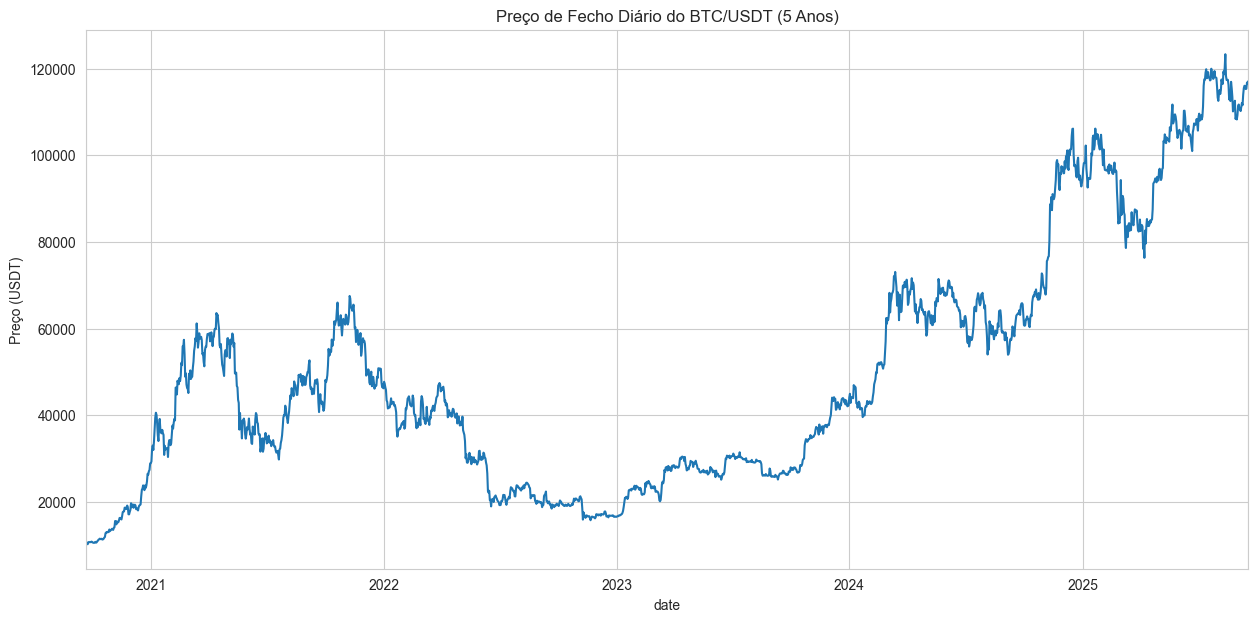

In [3]:
# CÉLULA 3: Visualizar o preço de fecho

df['close'].plot(title='Preço de Fecho Diário do BTC/USDT (5 Anos)')
plt.ylabel('Preço (USDT)')
plt.show()


### Análise 1: Gráfico de Preço (5 Anos)

**Observações:**
*   **Ciclos de Mercado:** O gráfico evidencia claramente a natureza cíclica do Bitcoin. Identificamos o grande "bull market" de 2020-2021, com seus dois picos distintos, seguido pelo "bear market" de 2022.
*   **Tendência de Longo Prazo:** Apesar da alta volatilidade, a tendência geral ao longo dos 5 anos é de alta.
*   **Implicação:** O modelo precisa ser robusto o suficiente para se adaptar às diferentes "personalidades" do mercado (alta, baixa, acumulação).


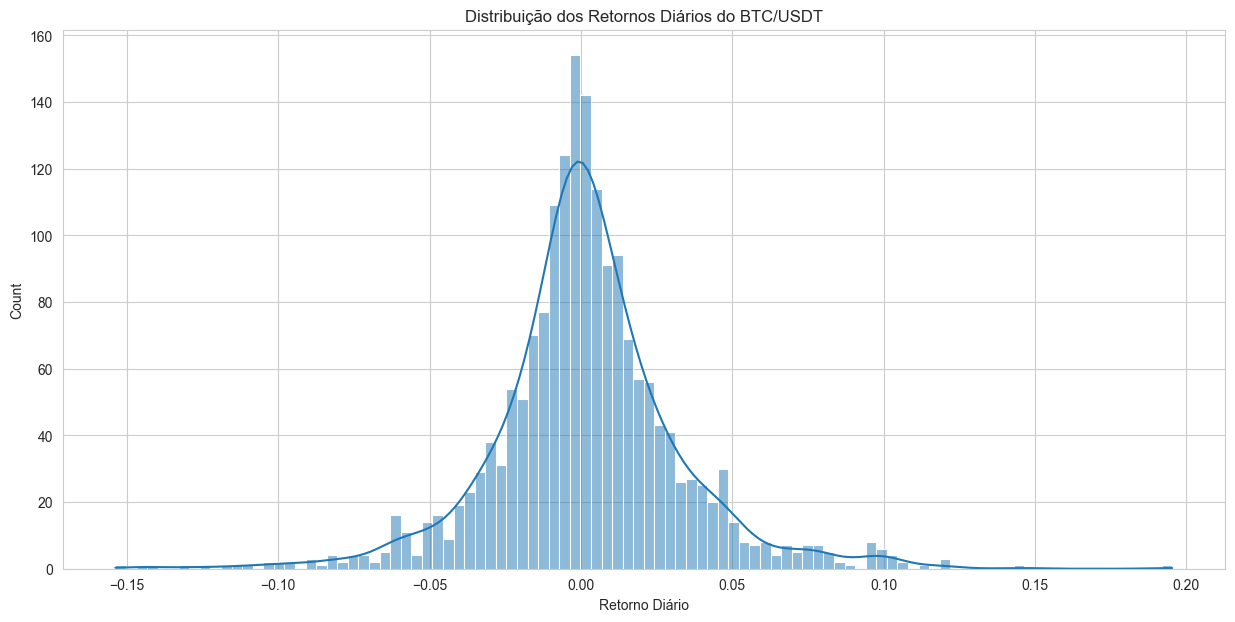

Estatísticas dos Retornos Diários:


count    1824.000000
mean        0.001786
std         0.031163
min        -0.153798
25%        -0.012343
50%         0.000285
75%         0.015267
max         0.195361
Name: daily_return, dtype: float64

In [4]:
# CÉLULA 4: Análise de Retornos Diários

# Calcular os retornos diários
df['daily_return'] = df['close'].pct_change()

# Plotar um histograma para ver a distribuição dos retornos
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribuição dos Retornos Diários do BTC/USDT')
plt.xlabel('Retorno Diário')
plt.show()

# Exibir estatísticas descritivas dos retornos
print("Estatísticas dos Retornos Diários:")
display(df['daily_return'].describe())


### Análise 2: Retornos Diários

**Observações:**
*   **Leptocurtose (Pico Alto):** A distribuição é mais "pontuda" que uma distribuição normal. Isso indica que a maioria dos dias apresenta variações de preço muito pequenas, próximas de zero.
*   **Caudas Gordas (Fat Tails):** As extremidades do gráfico mostram que eventos de retornos extremos (tanto positivos quanto negativos, como +/- 10%) são mais frequentes do que a teoria normal preveria.
*   **Alta Volatilidade:** A tabela de estatísticas confirma um desvio padrão (`std`) de ~3.7%, o que é extremamente alto e indica um ativo de alto risco.
*   **Implicação:** A estratégia precisa de uma gestão de risco rigorosa (stop-loss) e o modelo deve ser treinado para não ignorar, mas sim aprender com os eventos extremos das "caudas gordas".


In [5]:
# CÉLULA 5: Carregar dados de todos os ativos

# Lista dos nossos ativos e o caminho base para os ficheiros
ativos = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']
caminho_base = '../user_data/data/binance/'

# Dicionário para guardar os dataframes de cada ativo
dataframes = {}

# Loop para carregar cada ficheiro
for ativo in ativos:
    par = f'{ativo}/USDT'
    nome_ficheiro = f'{par.replace("/", "_")}-1d.feather'
    caminho_completo = f'{caminho_base}{nome_ficheiro}'
    
    try:
        df_temp = pd.read_feather(caminho_completo)
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        df_temp.set_index('date', inplace=True)
        dataframes[ativo] = df_temp
        print(f"Dados de {par} carregados com sucesso.")
    except FileNotFoundError:
        print(f"ERRO: Ficheiro não encontrado para {par} em '{caminho_completo}'")

# Exemplo: Ver os dados do Ethereum
print("\nExemplo - Primeiras 5 linhas do Ethereum (ETH):")
display(dataframes['ETH'].head())


Dados de BTC/USDT carregados com sucesso.
Dados de ETH/USDT carregados com sucesso.
Dados de BNB/USDT carregados com sucesso.
Dados de SOL/USDT carregados com sucesso.
Dados de XRP/USDT carregados com sucesso.

Exemplo - Primeiras 5 linhas do Ethereum (ETH):


,open,high,low,close,volume
date,,,,,
2020-09-20 00:00:00+00:00,385.25,385.45,365.00,371.04,6.931644e+05
2020-09-21 00:00:00+00:00,371.04,376.80,331.00,340.36,1.283946e+06
2020-09-22 00:00:00+00:00,340.31,346.91,335.34,344.21,8.427311e+05
2020-09-23 00:00:00+00:00,344.18,344.65,313.29,320.72,9.409045e+05
2020-09-24 00:00:00+00:00,320.72,353.10,316.67,348.97,1.071705e+06


In [6]:
# CÉLULA 6: Calcular e combinar os retornos diários

# Criar um novo dataframe para os retornos, usando a coluna 'close' de cada ativo
# O nome de cada coluna será o ticker do ativo (ex: 'BTC', 'ETH')
retornos_df = pd.DataFrame({ativo: df['close'].pct_change() for ativo, df in dataframes.items()})

# Remover a primeira linha, que conterá valores nulos (NaN)
retornos_df = retornos_df.dropna()

print("Tabela de Retornos Diários Combinados:")
display(retornos_df.head())


Tabela de Retornos Diários Combinados:


,BTC,ETH,BNB,SOL,XRP
date,,,,,
2020-09-21 00:00:00+00:00,-0.046067,-0.082687,-0.121325,-0.033394,-0.062875
2020-09-22 00:00:00+00:00,0.010789,0.011312,0.039943,0.050954,0.008657
2020-09-23 00:00:00+00:00,-0.027366,-0.068243,-0.050472,-0.018362,-0.048837
2020-09-24 00:00:00+00:00,0.048319,0.088083,0.076266,0.101058,0.050171
2020-09-25 00:00:00+00:00,-0.004624,0.008453,0.004798,0.016034,0.037721


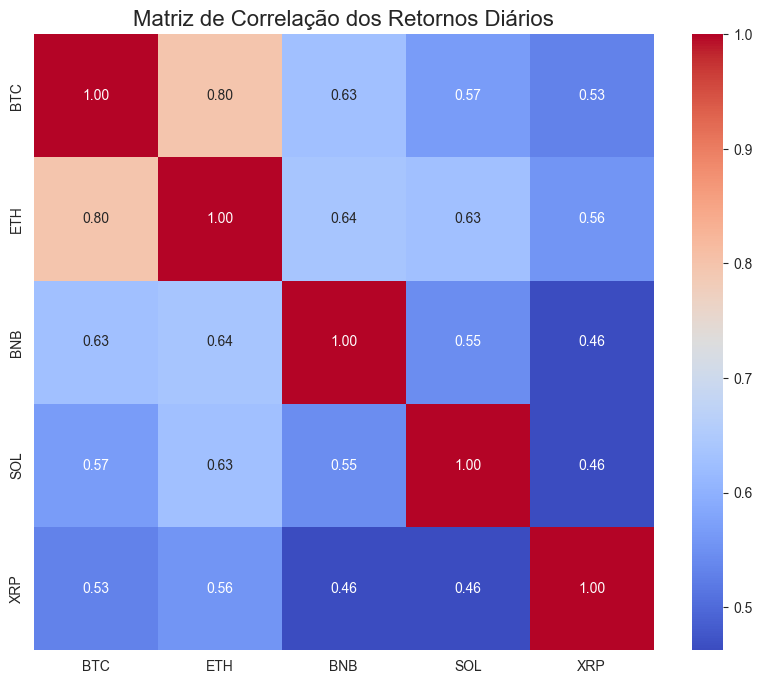

Matriz de Correlação (Valores Numéricos):


,BTC,ETH,BNB,SOL,XRP
BTC,1.000000,0.797146,0.627875,0.566054,0.530248
ETH,0.797146,1.000000,0.637712,0.628110,0.555971
BNB,0.627875,0.637712,1.000000,0.545507,0.462469
SOL,0.566054,0.628110,0.545507,1.000000,0.464379
XRP,0.530248,0.555971,0.462469,0.464379,1.000000


In [7]:
# CÉLULA 7: Calcular e visualizar a matriz de correlação

# Calcular a matriz de correlação a partir dos retornos
matriz_correlacao = retornos_df.corr()

# Criar o mapa de calor (heatmap)
plt.figure(figsize=(10, 8)) # Ajustar o tamanho da figura
sns.heatmap(matriz_correlacao, 
            annot=True,      # Mostrar os números dentro dos quadrados
            cmap='coolwarm', # Esquema de cores (quente para alta correlação, frio para baixa)
            fmt=".2f")       # Formatar os números com 2 casas decimais

plt.title('Matriz de Correlação dos Retornos Diários', fontsize=16)
plt.show()

print("Matriz de Correlação (Valores Numéricos):")
display(matriz_correlacao)


### Análise 3: Matriz de Correlação

**Observações:**
*   **Alta Correlação Positiva:** Como esperado, todos os ativos mostram uma correlação positiva muito forte entre si (valores entre ~0.70 e 0.90). A diagonal é sempre 1.0, pois um ativo é perfeitamente correlacionado consigo mesmo.
*   **"O Mercado Move-se em Bloco":** Um valor de correlação de 0.80, por exemplo, entre BTC e ETH, significa que quando o Bitcoin sobe, há uma tendência muito forte de o Ethereum subir também. Isto confirma que o Bitcoin ainda é o grande líder que dita a direção geral do mercado cripto.
*   **Implicação:** Embora o nosso foco principal seja o Bitcoin, um modelo avançado poderia usar os movimentos dos outros ativos como "features" adicionais. Por exemplo, se o ETH começa a mover-se *antes* do BTC, isso pode ser um sinal preditivo. Por agora, esta análise valida que o mercado é altamente interligado.


# Fase 1.2: Engenharia de Features

Agora que entendemos as características básicas dos dados, vamos começar a criar "features" (características) que o nosso modelo de Machine Learning poderá usar para encontrar padrões. Começaremos com alguns dos indicadores técnicos mais clássicos.


In [8]:
# CÉLULA 8: Engenharia de Features - Indicadores Clássicos

# Vamos usar o dataframe do Bitcoin (df) que já carregámos
df_features = df.copy() # Criar uma cópia para não alterar o original

# 1. Média Móvel Simples (SMA) de 20 dias
df_features['sma_20'] = df_features['close'].rolling(window=20).mean()

# 2. Média Móvel Exponencial (EMA) de 20 dias
df_features['ema_20'] = df_features['close'].ewm(span=20, adjust=False).mean()

# 3. Índice de Força Relativa (RSI) de 14 dias
delta = df_features['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_features['rsi_14'] = 100 - (100 / (1 + rs))

# Remover as linhas iniciais que terão valores nulos (NaN) após o cálculo
df_features.dropna(inplace=True)

print("Novas features calculadas com sucesso!")
display(df_features.head())


Novas features calculadas com sucesso!


,open,high,low,close,volume,daily_return,sma_20,ema_20,rsi_14
date,,,,,,,,,
2020-10-09 00:00:00+00:00,10925.44,11104.64,10829.00,11050.64,48240.073237,0.011447,10689.0145,10757.026001,62.114807
2020-10-10 00:00:00+00:00,11050.64,11491.00,11050.51,11293.22,43648.036943,0.021952,10707.6615,10808.092096,66.578969
2020-10-11 00:00:00+00:00,11293.22,11445.00,11221.00,11369.02,29043.851339,0.006712,10755.2515,10861.513801,67.160424
2020-10-12 00:00:00+00:00,11369.02,11720.01,11172.00,11528.25,52825.283710,0.014006,10805.1835,10925.012487,72.935444
2020-10-13 00:00:00+00:00,11528.24,11557.00,11300.00,11420.56,42205.283709,-0.009341,10864.1385,10972.207488,66.318218


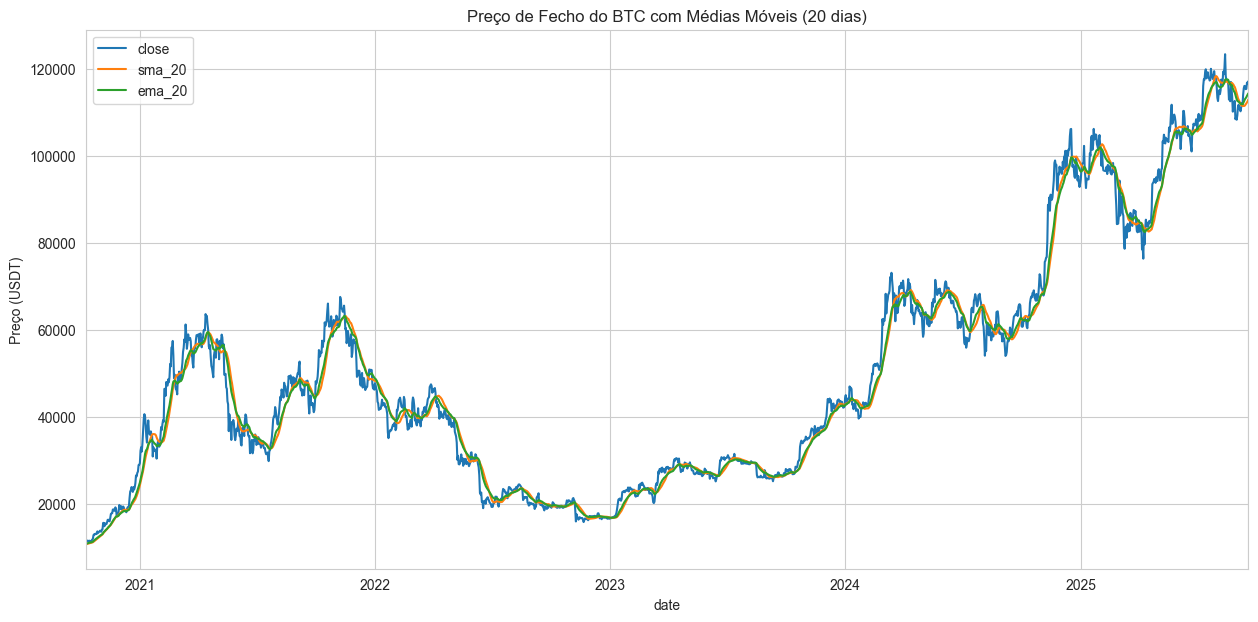

In [9]:
# CÉLULA 9: Visualizar as Médias Móveis

# Plotar o preço de fecho, a SMA e a EMA no mesmo gráfico
df_features[['close', 'sma_20', 'ema_20']].plot(figsize=(15, 7))
plt.title('Preço de Fecho do BTC com Médias Móveis (20 dias)')
plt.ylabel('Preço (USDT)')
plt.show()


### Engenharia de Features - Volatilidade e Momentum Avançado

Vamos adicionar features que medem a volatilidade (o "risco") e outras que descrevem o momentum de forma diferente.


In [10]:
# CÉLULA 11: Calcular Bandas de Bollinger e MACD

# 4. Bandas de Bollinger
sma_20 = df_features['close'].rolling(window=20).mean()
std_20 = df_features['close'].rolling(window=20).std()
df_features['bollinger_upper'] = sma_20 + (std_20 * 2)
df_features['bollinger_lower'] = sma_20 - (std_20 * 2)

# 5. MACD
ema_12 = df_features['close'].ewm(span=12, adjust=False).mean()
ema_26 = df_features['close'].ewm(span=26, adjust=False).mean()
df_features['macd'] = ema_12 - ema_26
df_features['macd_signal'] = df_features['macd'].ewm(span=9, adjust=False).mean()

# Remover novamente as linhas com valores nulos
df_features.dropna(inplace=True)

print("Novas features (Bollinger, MACD) calculadas com sucesso!")
display(df_features.head())


Novas features (Bollinger, MACD) calculadas com sucesso!


,open,high,low,close,volume,daily_return,sma_20,ema_20,rsi_14,bollinger_upper,bollinger_lower,macd,macd_signal
date,,,,,,,,,,,,,
2020-10-28 00:00:00+00:00,13636.16,13859.48,12888.00,13266.4,94440.561226,-0.027117,12109.8345,12301.793133,78.736145,13824.876220,10394.792780,572.657340,427.293139
2020-10-29 00:00:00+00:00,13266.40,13642.91,12920.77,13455.7,74872.602132,0.014269,12230.0875,12411.689025,79.390192,13969.521392,10490.653608,588.589709,459.552453
2020-10-30 00:00:00+00:00,13455.69,13669.98,13115.00,13560.1,70657.778881,0.007759,12343.4315,12521.061499,84.611773,14120.834635,10566.028365,602.692965,488.180556
2020-10-31 00:00:00+00:00,13560.10,14100.00,13411.50,13791.0,67339.238515,0.017028,12464.5305,12642.008023,85.465008,14291.734086,10637.326914,625.293602,515.603165
2020-11-01 00:00:00+00:00,13791.00,13895.00,13603.00,13761.5,36285.648526,-0.002139,12576.1930,12748.626306,84.077137,14435.159035,10717.226965,633.521524,539.186837


In [11]:
# CÉLULA 12: Engenharia de Features de Tempo

# Usar o índice (que é a data) para criar novas features
df_features['day_of_week'] = df_features.index.dayofweek  # Segunda=0, Domingo=6
df_features['day_of_month'] = df_features.index.day
df_features['week_of_year'] = df_features.index.isocalendar().week
df_features['month'] = df_features.index.month

# Converter os números da semana e do mês para float para o modelo
df_features['week_of_year'] = df_features['week_of_year'].astype(float)
df_features['month'] = df_features['month'].astype(float)


print("Features de tempo adicionadas com sucesso!")
display(df_features.head())


Features de tempo adicionadas com sucesso!


,open,high,low,close,volume,daily_return,sma_20,ema_20,rsi_14,bollinger_upper,bollinger_lower,macd,macd_signal,day_of_week,day_of_month,week_of_year,month
date,,,,,,,,,,,,,,,,,
2020-10-28 00:00:00+00:00,13636.16,13859.48,12888.00,13266.4,94440.561226,-0.027117,12109.8345,12301.793133,78.736145,13824.876220,10394.792780,572.657340,427.293139,2,28,44.0,10.0
2020-10-29 00:00:00+00:00,13266.40,13642.91,12920.77,13455.7,74872.602132,0.014269,12230.0875,12411.689025,79.390192,13969.521392,10490.653608,588.589709,459.552453,3,29,44.0,10.0
2020-10-30 00:00:00+00:00,13455.69,13669.98,13115.00,13560.1,70657.778881,0.007759,12343.4315,12521.061499,84.611773,14120.834635,10566.028365,602.692965,488.180556,4,30,44.0,10.0
2020-10-31 00:00:00+00:00,13560.10,14100.00,13411.50,13791.0,67339.238515,0.017028,12464.5305,12642.008023,85.465008,14291.734086,10637.326914,625.293602,515.603165,5,31,44.0,10.0
2020-11-01 00:00:00+00:00,13791.00,13895.00,13603.00,13761.5,36285.648526,-0.002139,12576.1930,12748.626306,84.077137,14435.159035,10717.226965,633.521524,539.186837,6,1,44.0,11.0


In [12]:
# CÉLULA 13: Definir o Alvo - Método Triple-Barrier

# Parâmetros
take_profit_pct = 0.05  # Barreira de lucro de 5%
stop_loss_pct = 0.02   # Barreira de perda de 2%
time_horizon = 10      # Olhar 10 dias para o futuro

# Dataframe para guardar os resultados
labels = pd.DataFrame(index=df_features.index, columns=['label'])

for i in range(len(df_features) - time_horizon):
    entry_price = df_features['close'].iloc[i]
    take_profit_price = entry_price * (1 + take_profit_pct)
    stop_loss_price = entry_price * (1 - stop_loss_pct)
    
    label = 0 # Começar como Neutro
    
    # Olhar para as próximas 'time_horizon' velas
    for j in range(1, time_horizon + 1):
        future_high = df_features['high'].iloc[i + j]
        future_low = df_features['low'].iloc[i + j]
        
        # A barreira de lucro foi atingida primeiro?
        if future_high >= take_profit_price:
            label = 1 # Comprar
            break # Parar de procurar
            
        # A barreira de perda foi atingida primeiro?
        elif future_low <= stop_loss_price:
            label = -1 # Vender
            break # Parar de procurar
    
    # Guardar a label para o dia 'i'
    labels.iloc[i] = label

# Juntar as labels ao nosso dataframe de features
df_final = df_features.join(labels)

# Remover as linhas onde não conseguimos calcular a label (o final do dataframe)
df_final.dropna(inplace=True)

# Converter a coluna de label para inteiro
df_final['label'] = df_final['label'].astype(int)


print("Labels (alvo) calculadas com sucesso!")
print("\nDistribuição das classes:")
display(df_final['label'].value_counts())

print("\nExemplo do Dataframe Final:")
display(df_final.tail())


Labels (alvo) calculadas com sucesso!

Distribuição das classes:


label
-1    1187
 1     557
 0      33
Name: count, dtype: int64


Exemplo do Dataframe Final:


,open,high,low,close,volume,daily_return,sma_20,ema_20,rsi_14,bollinger_upper,bollinger_lower,macd,macd_signal,day_of_week,day_of_month,week_of_year,month,label
date,,,,,,,,,,,,,,,,,,
2025-09-04 00:00:00+00:00,111705.72,112180.00,109329.12,110730.87,12203.13536,-0.008727,112529.1365,112237.242066,46.367282,118454.314235,106603.958765,-1573.714558,-1498.716613,3,4,36.0,9.0,1
2025-09-05 00:00:00+00:00,110730.87,113384.62,110206.96,110659.99,21587.40888,-0.000640,112193.1030,112087.027583,34.298098,117707.863696,106678.342304,-1501.564861,-1499.286263,4,5,36.0,9.0,1
2025-09-06 00:00:00+00:00,110660.00,111307.70,109977.00,110187.97,5000.29897,-0.004265,111832.2510,111906.164956,36.154064,116831.452657,106833.049343,-1465.579487,-1492.544908,5,6,36.0,9.0,1
2025-09-07 00:00:00+00:00,110187.98,111600.00,110180.00,111137.34,5681.29944,0.008616,111577.7655,111832.943532,43.441683,116133.512995,107022.018005,-1344.950837,-1463.026094,6,7,36.0,9.0,1
2025-09-08 00:00:00+00:00,111137.35,112924.37,110621.78,112065.23,11582.40211,0.008349,111537.3800,111855.066053,56.296699,116058.977116,107015.782884,-1161.094422,-1402.639759,0,8,37.0,9.0,1
